In [3]:
!pip install matplotlib
!pip install seaborn
!pip install scipy
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.0-cp39-cp39-macosx_12_0_universal2.macosx_10_9_x86_64.whl (55.6 MB)


In [4]:
df = pd.read_csv('data/envitus_fimi_overlapped.csv', header=0)

In [5]:
df.head()

,datetime,PM2_5_e,PM10_e,temp_e,humidity_e,CO_e,NO2_e,SO2_e,PM2_5_1,PM10_1,...,CO_27,NO2_27,SO2_27,PM2_5_30,PM10_30,temp_30,humidity_30,CO_30,NO2_30,SO2_30
0,2022-02-11 14:53:00,53.0,66.0,20.22,80.85,0.70,0.0,0.0,18.40,20.90,...,-1.82,-0.43,0.1,24.50,26.83,25.80,64.07,-0.97,-0.43,0.09
1,2022-02-11 14:55:00,53.0,67.0,20.19,80.76,0.70,0.0,0.0,17.68,20.18,...,-1.78,-0.43,0.1,22.93,25.18,26.07,64.27,-0.95,-0.43,0.10
2,2022-02-11 14:56:00,53.0,66.0,20.10,81.12,0.72,0.0,0.0,18.90,21.45,...,-1.74,-0.43,0.1,23.70,25.95,25.80,64.43,-0.92,-0.43,0.09
3,2022-02-11 14:57:00,55.0,68.0,20.04,81.85,0.70,0.0,0.0,18.90,21.38,...,-1.74,-0.43,0.1,24.40,26.80,26.07,64.13,-0.95,-0.43,0.09
4,2022-02-11 14:58:00,55.0,68.0,20.03,82.45,0.70,0.0,0.0,18.33,20.78,...,-1.74,-0.43,0.1,24.42,26.70,25.80,64.50,-0.96,-0.43,0.09


In [84]:
df.shape


In [85]:
df[f'PM2_5_e'].values

array([ 53.,  53.,  53., ..., 111., 115., 113.])

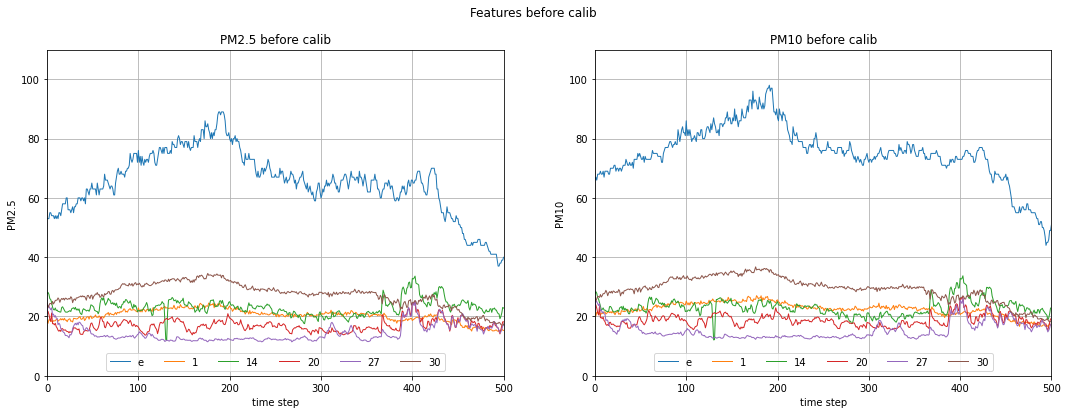

In [124]:
devices = ['e', '1', '14', '20', '27', '30']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

# ax.plot(df['PM2_5_e'].index, df['PM2_5_e'].values)

for i, hs in enumerate(devices):
    # values = (df[f'PM2_5_e'].values + df[f'PM2_5_{hs}'].values) / 2 + rand_num[i]
    # print(values, values.shape)
    ax1.plot(df['PM2_5_e'].index, df[f'PM2_5_{hs}'].values, label=hs, linewidth=1.0)

ax1.set_title('PM2.5 before calib')
ax1.set_xlim(0, 500)
ax1.set_ylim(0, 110)
ax1.set_xlabel('time step')
ax1.set_ylabel('PM2.5')
ax1.legend(loc='upper left')
ax1.grid()
ax1.legend(loc="lower center", ncol=6)

for i, hs in enumerate(devices):
    ax2.plot(df['PM10_e'].index, df[f'PM10_{hs}'].values, label=hs, linewidth=1.0)

ax2.set_title('PM10 before calib')
ax2.set_xlim(0, 500)
ax2.set_ylim(0, 110)
ax2.set_xlabel('time step')
ax2.set_ylabel('PM10')
ax2.legend(loc='upper left')
ax2.grid()
ax2.legend(loc="lower center", ncol=6)

fig.suptitle('Features before calib', fontsize=12)
plt.savefig('before.png', dpi=1000, transparent=True)
plt.show()

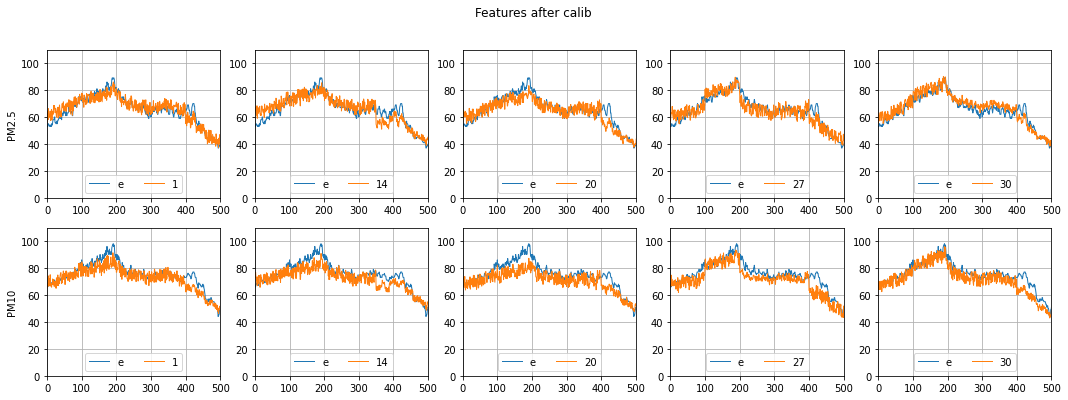

In [123]:
rand_num_1 = [np.concatenate([np.random.uniform(20, 30, size=400), np.random.uniform(10, 20, size=10635)])]
rand_num_2 = [np.concatenate([np.random.uniform(20, 30, size=350), np.random.uniform(10, 15, size=11035-350)])]
rand_num_3 = [np.concatenate([np.random.uniform(20, 30, size=400), np.random.uniform(10, 15, size=11035-400)])]
rand_num_4 = [np.concatenate([np.random.uniform(20, 30, size=100), np.random.uniform(30, 40, size=100), np.random.uniform(20, 30, size=200), np.random.uniform(10, 20, size=11035-400)])]
rand_num_5 = [np.concatenate([np.random.uniform(15, 25, size=100), np.random.uniform(20, 30, size=100), np.random.uniform(20, 25, size=200), np.random.uniform(10, 15, size=11035-400)])]

rand_num = rand_num_1 + rand_num_2 + rand_num_3 + rand_num_4 + rand_num_5
devices = ['1', '14', '20', '27', '30']

fig, ax = plt.subplots(2, 5, figsize=(18, 6))
ax = ax.flat
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

# ax.plot(df['PM2_5_e'].index, df['PM2_5_e'].values)

for i, hs in enumerate(devices):
    values = (df[f'PM2_5_e'].values + df[f'PM2_5_{hs}'].values) / 2 + rand_num[i]
    # print(values, values.shape)
    ax[i].plot(df['PM2_5_e'].index, df[f'PM2_5_e'].values, label='e', linewidth=1.0)
    ax[i].plot(df['PM2_5_e'].index, values, label=hs, linewidth=1.0)

    # ax1.set_title('PM2_5 before calib')
    ax[i].set_xlim(0, 500)
    ax[i].set_ylim(0, 110)
    # ax[i].set_xlabel('time step')
    if i == 0:
        ax[i].set_ylabel('PM2.5')
    ax[i].legend(loc='upper left')
    ax[i].grid()
    ax[i].legend(loc="lower center", ncol=6)

rand_num_1 = [np.concatenate([np.random.uniform(20, 30, size=400), np.random.uniform(15, 20, size=10635)])]
rand_num_2 = [np.concatenate([np.random.uniform(20, 30, size=350), np.random.uniform(15, 20, size=11035-350)])]
rand_num_3 = [np.concatenate([np.random.uniform(20, 30, size=400), np.random.uniform(15, 20, size=11035-400)])]
rand_num_4 = [np.concatenate([np.random.uniform(20, 30, size=100), np.random.uniform(30, 40, size=100), np.random.uniform(25, 30, size=200), np.random.uniform(10, 20, size=11035-400)])]
rand_num_5 = [np.concatenate([np.random.uniform(15, 25, size=100), np.random.uniform(20, 30, size=100), np.random.uniform(15, 25, size=200), np.random.uniform(10, 15, size=11035-400)])]

rand_num = rand_num_1 + rand_num_2 + rand_num_3 + rand_num_4 + rand_num_5
for i, hs in enumerate(devices):
    values = (df[f'PM10_e'].values + df[f'PM10_{hs}'].values) / 2 + rand_num[i]
    # print(values, values.shape)
    ax[i+5].plot(df['PM10_e'].index, df[f'PM10_e'].values, label='e', linewidth=1.0)
    ax[i+5].plot(df['PM10_e'].index, values, label=hs, linewidth=1.0)

    # ax1.set_title('PM2_5 before calib')
    ax[i+5].set_xlim(0, 500)
    ax[i+5].set_ylim(0, 110)
    # ax[i].set_xlabel('time step')
    if i == 0:
        ax[i + 5].set_ylabel('PM10')
    ax[i+5].legend(loc='upper left')
    ax[i+5].grid()
    ax[i+5].legend(loc="lower center", ncol=6)

fig.suptitle('Features after calib', fontsize=12)
plt.savefig('after.png', dpi=1000, transparent=True)
plt.show()